In [13]:
import matplotlib.pyplot as plt 

from cie_colorimetry.colorimetry import (
    calculate_cie_coordinates, 
    calculate_dominant_wavelength, 
    calculate_saturation,
)
from cie_colorimetry.plotting import (
    plot_cie_coordinates
)
from cie_colorimetry.utils import load_spectrum_from_file

# Load the spectrum data
wavelengths, counts = load_spectrum_from_file("cie_colorimetry/data/spectral_locus.csv", 
                                            wavelength_col="Wavelength (nm)", 
                                            counts_col="Counts")

# Calculate CIE coordinates
x, y = calculate_cie_coordinates(wavelengths, counts)

# Calculate dominant wavelength
dominant_wavelength = calculate_dominant_wavelength(x, y)

# Calculate saturation
saturation = calculate_saturation(x, y, dominant_wavelength)

# Print results
print(f"CIE coordinates: ({x:.3f}, {y:.3f})")
print(f"Dominant wavelength: {dominant_wavelength:.1f} nm")
print(f"Saturation: {saturation:.1f}%")


CIE coordinates: (0.144, 0.042)
Dominant wavelength: 577.4 nm
Saturation: 146.6%


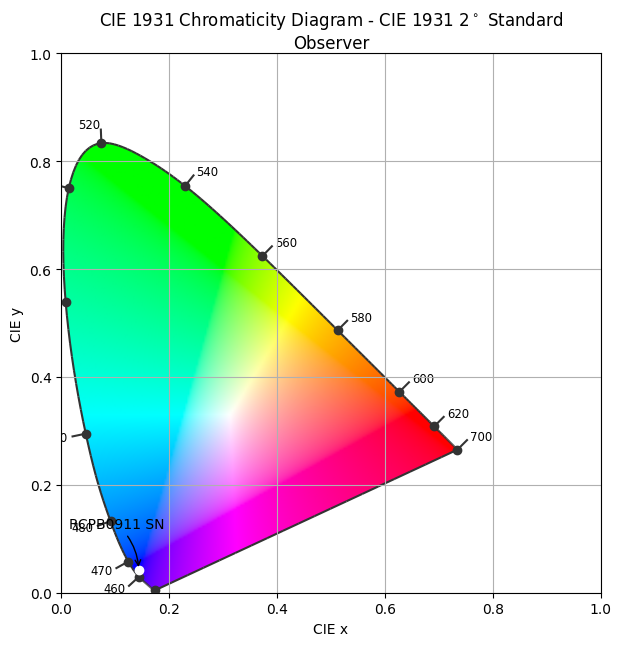

(<Figure size 640x640 with 1 Axes>,
 <Axes: title={'center': 'CIE 1931 Chromaticity Diagram - CIE 1931 2$^\\circ$ Standard Observer'}, xlabel='CIE x', ylabel='CIE y'>)

In [14]:
import colour
import colour.colorimetry.datasets as dataset
from colour.plotting import *
from colour.plotting.diagrams import plot_chromaticity_diagram_CIE1931
# Plotting the *CIE 1931 Chromaticity Diagram*.
# The argument *standalone=False* is passed so that the plot doesn't get displayed
# and can be used as a basis for other plots.
plot_chromaticity_diagram_CIE1931(standalone=False)

# Plotting the *xy* chromaticity coordinates.
plt.plot(x, y, 'o-', color='white')
plt.grid()

# Annotating the plot.
plt.annotate('RCPB0911 SN',
             [x,y],
             xytext=(-50, 30),
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=-0.2'))

# Displaying the plot.
render(
    standalone=True,
    limits=(-0.1, 0.8, -0.1, 0.9),
    x_tighten=True,
    y_tighten=True)